# Worksheet 23

Name: Youxuan Ma

UID: U23330522

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

In [15]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

2.15.0
2.15.0


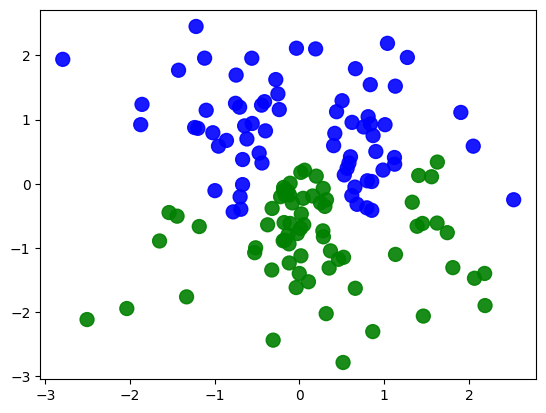

Epoch 1/200
3/3 [==============================] - 0s 1ms/step - loss: 0.7344
Epoch 2/200
3/3 [==============================] - 0s 720us/step - loss: 0.7314
Epoch 3/200
3/3 [==============================] - 0s 748us/step - loss: 0.7294
Epoch 4/200
3/3 [==============================] - 0s 931us/step - loss: 0.7278
Epoch 5/200
3/3 [==============================] - 0s 671us/step - loss: 0.7263
Epoch 6/200
3/3 [==============================] - 0s 821us/step - loss: 0.7249
Epoch 7/200
3/3 [==============================] - 0s 659us/step - loss: 0.7236
Epoch 8/200
3/3 [==============================] - 0s 680us/step - loss: 0.7225
Epoch 9/200
3/3 [==============================] - 0s 723us/step - loss: 0.7213
Epoch 10/200
3/3 [==============================] - 0s 644us/step - loss: 0.7202
Epoch 11/200
3/3 [==============================] - 0s 601us/step - loss: 0.7190
Epoch 12/200
3/3 [==============================] - 0s 695us/step - loss: 0.7180
Epoch 13/200
3/3 [=====================

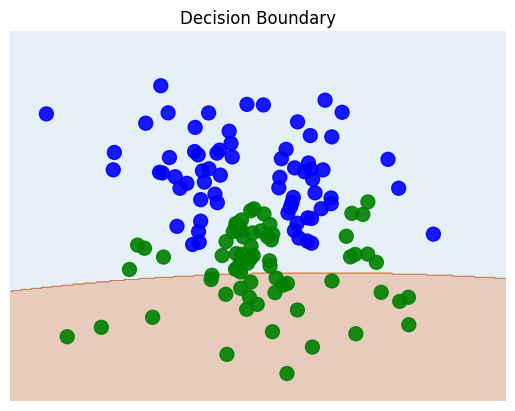

In [16]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import math, random, stack
from keras import layers, initializers
from keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200)

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()

## Trying Out Different Models:

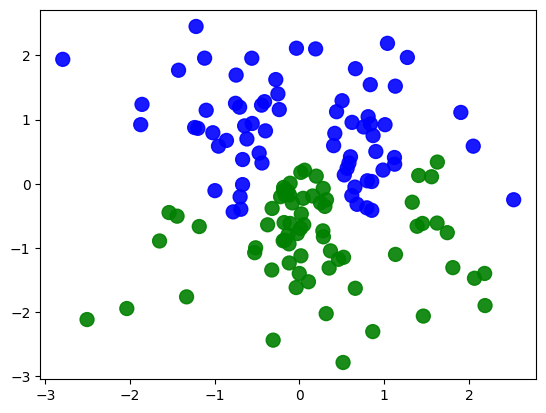

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 0.9761 - accuracy: 0.1314
Epoch 2/200
3/3 [==============================] - 0s 794us/step - loss: 0.8751 - accuracy: 0.2482
Epoch 3/200
3/3 [==============================] - 0s 756us/step - loss: 0.8106 - accuracy: 0.4964
Epoch 4/200
3/3 [==============================] - 0s 942us/step - loss: 0.7731 - accuracy: 0.5985
Epoch 5/200
3/3 [==============================] - 0s 836us/step - loss: 0.7507 - accuracy: 0.7080
Epoch 6/200
3/3 [==============================] - 0s 740us/step - loss: 0.7325 - accuracy: 0.8029
Epoch 7/200
3/3 [==============================] - 0s 705us/step - loss: 0.7144 - accuracy: 0.8832
Epoch 8/200
3/3 [==============================] - 0s 718us/step - loss: 0.6941 - accuracy: 0.8759
Epoch 9/200
3/3 [==============================] - 0s 816us/step - loss: 0.6707 - accuracy: 0.8759
Epoch 10/200
3/3 [==============================] - 0s 804us/step - loss: 0.6444 - accuracy: 0.8686
Epoch 11/20

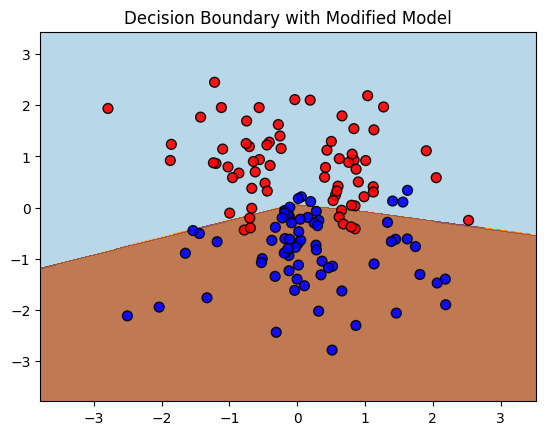

In [17]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import math, random, stack
from keras import layers, initializers, models, optimizers
from keras.activations import relu
from keras.regularizers import l2

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# Modified the initial model with improved architecture and regularizers
model = models.Sequential([
    layers.Dense(10, input_dim=2, activation="relu", kernel_regularizer=l2(0.01)),
    layers.Dense(10, activation="relu", kernel_regularizer=l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model with Adam optimizer
model.compile(optimizer=optimizers.legacy.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200)

# Plot the decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=['b' if y else 'r' for y in Y], edgecolors='k', s=50, alpha=0.9)
plt.title("Decision Boundary with Modified Model")
plt.show()

### Hyperparameter Tuning for Better Performance

In [18]:
neurons_grid = [10, 20, 30]  # Number of neurons in each layer
learning_rate_grid = [0.1, 0.01, 0.001]  # Learning rate for optimization
regularization_grid = [0.01, 0.001, 0.0001]  # L2 regularization factor

def build_model(n_neurons, learning_rate, regularization):
    model = models.Sequential([
        layers.Dense(n_neurons, input_dim=2, activation="relu",
                     kernel_regularizer=l2(regularization)),
        layers.Dense(n_neurons, activation="relu", kernel_regularizer=l2(regularization)),
        layers.Dense(1, activation="sigmoid")
    ])
    optimizer = optimizers.legacy.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

best_score = 0
best_params = {}

for n_neurons in neurons_grid:
    for learning_rate in learning_rate_grid:
        for regularization in regularization_grid:
            # Build and compile the model
            model = build_model(n_neurons, learning_rate, regularization)
            # Fit the model
            history = model.fit(X, Y, batch_size=16, epochs=100, verbose=0)
            # Evaluate the model's performance
            score = model.evaluate(X, Y, verbose=0)
            # Save parameters and score if best
            if score[1] > best_score:
                best_score = score[1]
                best_params = {'neurons': n_neurons,
                               'learning_rate': learning_rate,
                               'regularization': regularization}

print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")



Best Score: 1.0
Best Parameters: {'neurons': 30, 'learning_rate': 0.1, 'regularization': 0.0001}


In [19]:
final_model = build_model(best_params['neurons'],
                          best_params['learning_rate'],
                          best_params['regularization'])

# Train it with more epochs
final_history = final_model.fit(X, Y, batch_size=16, epochs=300, verbose=1)

# Final model evaluation
final_score = final_model.evaluate(X, Y, verbose=0)
print(f"Final Model Score: {final_score}")

Epoch 1/300
9/9 [==============================] - 0s 766us/step - loss: 0.4442 - accuracy: 0.8613
Epoch 2/300
9/9 [==============================] - 0s 626us/step - loss: 0.3026 - accuracy: 0.8978
Epoch 3/300
9/9 [==============================] - 0s 625us/step - loss: 0.2975 - accuracy: 0.8686
Epoch 4/300
9/9 [==============================] - 0s 614us/step - loss: 0.2547 - accuracy: 0.8905
Epoch 5/300
9/9 [==============================] - 0s 601us/step - loss: 0.2425 - accuracy: 0.8832
Epoch 6/300
9/9 [==============================] - 0s 618us/step - loss: 0.2197 - accuracy: 0.8686
Epoch 7/300
9/9 [==============================] - 0s 533us/step - loss: 0.2333 - accuracy: 0.8978
Epoch 8/300
9/9 [==============================] - 0s 629us/step - loss: 0.1814 - accuracy: 0.8832
Epoch 9/300
9/9 [==============================] - 0s 596us/step - loss: 0.2032 - accuracy: 0.9270
Epoch 10/300
9/9 [==============================] - 0s 634us/step - loss: 0.2484 - accuracy: 0.8394
Epoch 11/

4152/4152 [==============================] - 1s 219us/step


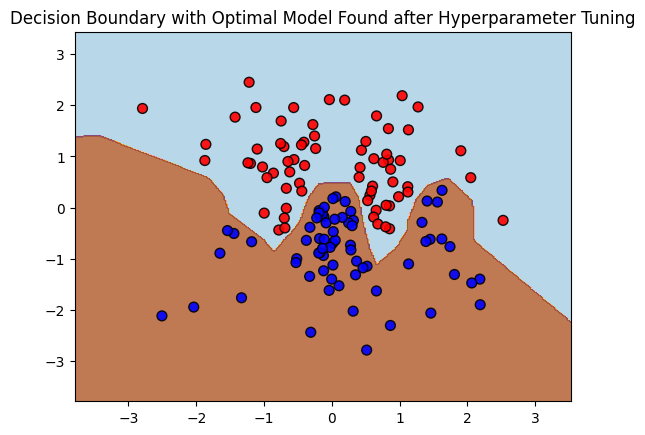

In [20]:
# Plot the decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=['b' if y else 'r' for y in Y], edgecolors='k', s=50, alpha=0.9)
plt.title("Decision Boundary with Optimal Model Found after Hyperparameter Tuning")
plt.show()